Here, We are going to choose To-Be_Converted as Target feature.

In [287]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [288]:
#Loading data
df=pd.read_csv('END_TO_END_SALES.csv')
df

,Namee,Email,Contact,City,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,Dinesh Deenu,dinesgdeenu88123@gmgil.com,9923998794,Bageshwar,Google Ad,Ronak Jadhav,End Lead,NO,NO
1,Chellapandi Pandi,cpcginnng@gmgil.com,9782442949,Madurai,Google Ad,Deepali Kasatwar,Active lead,NO,NO
2,Anand Nanda,gngndngndg990@gmgil.com,8929922349,jamakandi,Google Ad,Roshan Patil,Active lead,NO,NO
3,Saroj Kumar,sknilgm88@gmgil.com,8921739233,Kolkata,Google Ad,Kiran Dhakal,Active lead,NO,NO
4,Jitendrasinh Rajput Garashiya,jitendrgsingrgjput345345@gmgil.com,9323891992,Anand,Insta,Pooja Melwani,Active lead,NO,NO
...,...,...,...,...,...,...,...,...,...
995,daniel,dgnieljognson789@yggoo.com,9247832721,Mumbai,FB,Abhijeet Bramhane,Hot lead,NO,YES
996,sophia p,sopgigprice234@gmgil.com,9243212721,Nagpur,FB,Akash Sharma,Hot lead,YES,Coverted
997,william adams,willigmgdgms456@gotmgil.com,9229432721,Dibrugarh,FB,Suryakant Choudhary,End Lead,NO,NO
998,mialee,miglee789@yggoo.com,9243192721,Vaidpura Etawah,FB,Sushant Nikam,End Lead,NO,NO


In [289]:
# Taking the features that we need for processing
df=df[['Referencee','Handled_By','Leadd','Converted','To_Be_Converted']]
df

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,Google Ad,Ronak Jadhav,End Lead,NO,NO
1,Google Ad,Deepali Kasatwar,Active lead,NO,NO
2,Google Ad,Roshan Patil,Active lead,NO,NO
3,Google Ad,Kiran Dhakal,Active lead,NO,NO
4,Insta,Pooja Melwani,Active lead,NO,NO
...,...,...,...,...,...
995,FB,Abhijeet Bramhane,Hot lead,NO,YES
996,FB,Akash Sharma,Hot lead,YES,Coverted
997,FB,Suryakant Choudhary,End Lead,NO,NO
998,FB,Sushant Nikam,End Lead,NO,NO


In [290]:
# Checking for null values in any row
df.isnull().sum()

Referencee         0
Handled_By         0
Leadd              0
Converted          0
To_Be_Converted    0
dtype: int64

In [291]:
# Descriptive statistic
df.describe()

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
count,1000,1000,1000,1000,1000
unique,7,18,3,2,4
top,FB,Deepali Kasatwar,End Lead,NO,NO
freq,228,66,496,938,912


In [292]:
df['To_Be_Converted'].unique()

array(['NO', 'Coverted', 'YES', 'Converted'], dtype=object)

As there are only 3 categorical values in To_Be-Converted Feature but there is slight mistake while putting values in this feature.

In [293]:
#We need to replace coverted into converted.
rep={'Coverted':'Converted'}
df['To_Be_Converted']=df['To_Be_Converted'].replace(rep)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\1793181843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To_Be_Converted']=df['To_Be_Converted'].replace(rep)


In [294]:
# Now if we check categorical values in To-Be_Converted we will be able to see only 3 values.
df['To_Be_Converted'].unique()

array(['NO', 'Converted', 'YES'], dtype=object)

In [295]:
# checking unique categories in 'Leadd'
df['Leadd'].unique()

array(['End Lead', 'Active lead', 'Hot lead'], dtype=object)

In [296]:
# Counts of each Categories present in 'Leadd'
df['Leadd'].value_counts()

End Lead       496
Active lead    362
Hot lead       142
Name: Leadd, dtype: int64

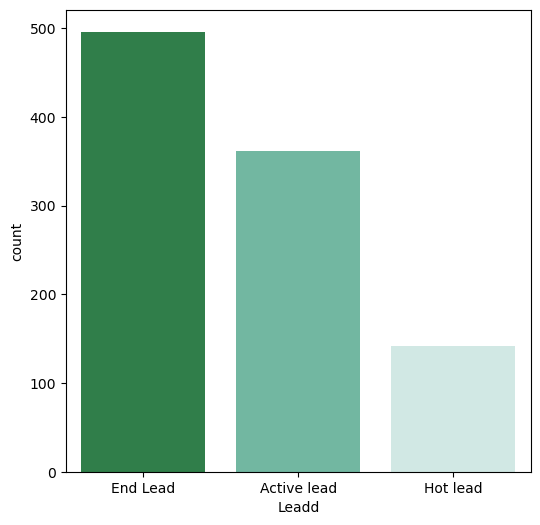

In [297]:
# counting leads through visualization
plt.figure(figsize=(6,6))
sns.countplot(x='Leadd',data=df,palette ="BuGn_r")
plt.show()

In [298]:
#Counts of people as per customers they had handled 
df['Handled_By'].value_counts()

Deepali Kasatwar       66
Nilesh Shinde          65
Ronak Jadhav           64
Sushant Nikam          64
Anchal Mishra          64
Abhijeet Bramhane      61
Azimuddin Mohd         61
Roshan Patil           60
Pooja Melwani          60
Tamanna Sahu           59
Deepali Yadav          57
Manisha Parte          56
Ritik Yadav            55
Kiran Dhakal           54
Akash Sharma           53
Suryakant Choudhary    51
Rohit Sonar            40
Senthil Nadar          10
Name: Handled_By, dtype: int64

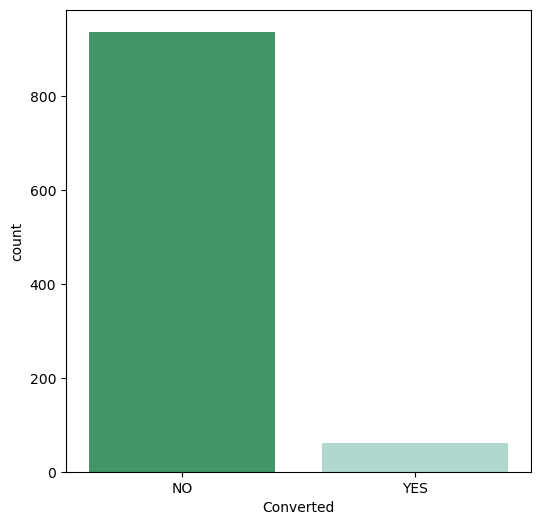

In [299]:
# counting no of customer converted and those not converted through visulization
plt.figure(figsize=(6,6))
sns.countplot(x='Converted',data=df,palette ="BuGn_r")
plt.show()

In [300]:
df['Referencee'].unique()

array(['Google Ad', 'Insta', 'FB', 'Investment Leads', 'Calling',
       'whatsapp', 'PZ VIP'], dtype=object)

In [301]:
df['Referencee'].value_counts()

FB                  228
Insta               220
Investment Leads    200
Google Ad           195
whatsapp             98
Calling              31
PZ VIP               28
Name: Referencee, dtype: int64

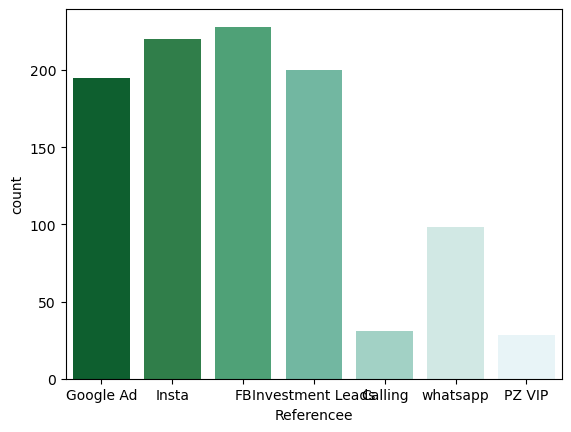

In [302]:
sns.countplot(x='Referencee',data=df,palette ="BuGn_r")
plt.show()

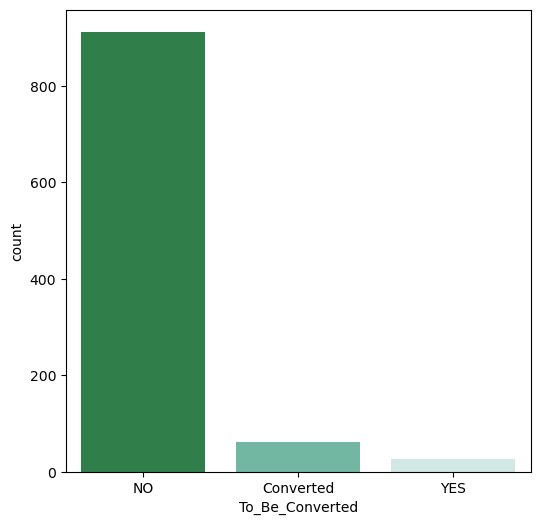

In [303]:
# counting no of customer converted and those who are going to convert through visulization
plt.figure(figsize=(6,6))
sns.countplot(x='To_Be_Converted',data=df,palette ="BuGn_r")
plt.show()

In above plot Converted means those who are already buyed the product and yes means customers who are going to buy.

In [304]:
# For data processing
from sklearn import preprocessing


In [305]:
label_Encoder=preprocessing.LabelEncoder()

In [306]:
# Encode the column Lead
df['Leadd']=label_Encoder.fit_transform(df['Leadd'])
# 0===Active lead =Customer had still not said that I havent liked the product(had shown some interst)
# 1===End Lead =Customer had said that he is not intersted in the product
# 2===Hot Lead =Customer had liked the product

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\4075583348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leadd']=label_Encoder.fit_transform(df['Leadd'])


In [307]:

# Encode the column Converted column
df['Converted']=label_Encoder.fit_transform(df['Converted'])

# 0===NO
# 1===YES

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\1766860666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Converted']=label_Encoder.fit_transform(df['Converted'])


In [308]:
# Ordinal encoder on Hanled_By
Encode_Handles_By={'Deepali Kasatwar':0,'Nilesh Shinde':1,'Ronak Jadhav':2,'Sushant Nikam':4,
                   'Anchal Mishra':5,'Abhijeet Bramhane':6,'Azimuddin Mohd':7,'Roshan Patil':8,
                   'Pooja Melwani':9,'Tamanna Sahu':10,'Deepali Yadav':11,'Manisha Parte':12,'Ritik Yadav':13,
                   'Kiran Dhakal':14,'Akash Sharma':15,'Suryakant Choudhary':16,'Rohit Sonar':17,'Senthil Nadar':18}

df['Handled_By']=df['Handled_By'].replace(Encode_Handles_By)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\216669258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Handled_By']=df['Handled_By'].replace(Encode_Handles_By)


In [309]:
df[1:40]

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
1,Google Ad,0,0,0,NO
2,Google Ad,8,0,0,NO
3,Google Ad,14,0,0,NO
4,Insta,9,0,0,NO
5,Insta,12,0,0,NO
6,Insta,5,2,0,NO
7,Insta,1,0,0,NO
8,Insta,11,0,0,NO
9,Insta,13,1,0,NO
10,Insta,6,1,0,NO


In [310]:
# Ordinal Encoding on Reference
Encode_Reference={'FB':0,'Google Ad':1,'Insta':2,'Investment Leads':3,'Calling':4,'whatsapp':4,'PZ VIP':5}
df['Referencee']=df['Referencee'].replace(Encode_Reference)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\1757216728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Referencee']=df['Referencee'].replace(Encode_Reference)


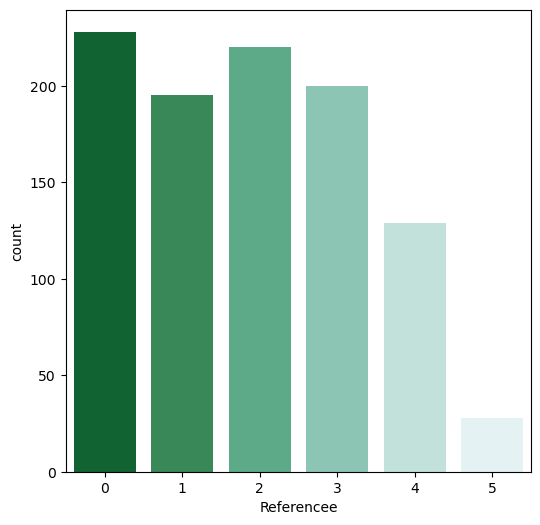

In [311]:
# visualization of reference
plt.figure(figsize=(6,6))
sns.countplot(x='Referencee',data=df,palette ="BuGn_r")
plt.show()

In [312]:
# Ordinal encoding for To_Be_Converted
to_be={'NO':0,'Converted':1,'YES':2}
df['To_Be_Converted']=df['To_Be_Converted'].replace(to_be)



C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\3746825190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To_Be_Converted']=df['To_Be_Converted'].replace(to_be)


In [313]:
df

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,1,2,1,0,0
1,1,0,0,0,0
2,1,8,0,0,0
3,1,14,0,0,0
4,2,9,0,0,0
...,...,...,...,...,...
995,0,6,2,0,2
996,0,15,2,1,1
997,0,16,1,0,0
998,0,4,1,0,0


In [314]:
# Spliting in x and y 
x=df[['Referencee','Handled_By','Leadd','Converted']]
y=df['To_Be_Converted']

In [315]:
x

,Referencee,Handled_By,Leadd,Converted
0,1,2,1,0
1,1,0,0,0
2,1,8,0,0
3,1,14,0,0
4,2,9,0,0
...,...,...,...,...
995,0,6,2,0
996,0,15,2,1
997,0,16,1,0
998,0,4,1,0


In [316]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    1
997    0
998    0
999    0
Name: To_Be_Converted, Length: 1000, dtype: int64

In [317]:
y=pd.DataFrame(y)
y

,To_Be_Converted
0,0
1,0
2,0
3,0
4,0
...,...
995,2
996,1
997,0
998,0


In [318]:
# Training And Testing the Dataset
from sklearn.model_selection import train_test_split


#Giving Test size to 20% and random state to 30.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 4) (800, 1)
Test set: (200, 4) (200, 1)


In [319]:
#Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler=StandardScaler()

xtrain=scaler.fit_transform(X_train)
xtest=scaler.transform(X_test)

In [320]:
 # Applying logistic regression on data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 


c:\Users\AMEYA RAJESH PATIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMEYA RAJESH PATIL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [321]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [322]:
#Accuracy 
acc=accuracy_score(y_test,y_pred)
acc

0.965

In [323]:
#Loading data
df=pd.read_csv('END_TO_END_SALES.csv')
df

,Namee,Email,Contact,City,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,Dinesh Deenu,dinesgdeenu88123@gmgil.com,9923998794,Bageshwar,Google Ad,Ronak Jadhav,End Lead,NO,NO
1,Chellapandi Pandi,cpcginnng@gmgil.com,9782442949,Madurai,Google Ad,Deepali Kasatwar,Active lead,NO,NO
2,Anand Nanda,gngndngndg990@gmgil.com,8929922349,jamakandi,Google Ad,Roshan Patil,Active lead,NO,NO
3,Saroj Kumar,sknilgm88@gmgil.com,8921739233,Kolkata,Google Ad,Kiran Dhakal,Active lead,NO,NO
4,Jitendrasinh Rajput Garashiya,jitendrgsingrgjput345345@gmgil.com,9323891992,Anand,Insta,Pooja Melwani,Active lead,NO,NO
...,...,...,...,...,...,...,...,...,...
995,daniel,dgnieljognson789@yggoo.com,9247832721,Mumbai,FB,Abhijeet Bramhane,Hot lead,NO,YES
996,sophia p,sopgigprice234@gmgil.com,9243212721,Nagpur,FB,Akash Sharma,Hot lead,YES,Coverted
997,william adams,willigmgdgms456@gotmgil.com,9229432721,Dibrugarh,FB,Suryakant Choudhary,End Lead,NO,NO
998,mialee,miglee789@yggoo.com,9243192721,Vaidpura Etawah,FB,Sushant Nikam,End Lead,NO,NO


In [324]:
#We need to replace coverted into converted.
rep={'Coverted':'Converted'}
df['To_Be_Converted']=df['To_Be_Converted'].replace(rep)

In [325]:
# Taking the features that we need for processing
df=df[['Referencee','Handled_By','Leadd','Converted','To_Be_Converted']]
df

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,Google Ad,Ronak Jadhav,End Lead,NO,NO
1,Google Ad,Deepali Kasatwar,Active lead,NO,NO
2,Google Ad,Roshan Patil,Active lead,NO,NO
3,Google Ad,Kiran Dhakal,Active lead,NO,NO
4,Insta,Pooja Melwani,Active lead,NO,NO
...,...,...,...,...,...
995,FB,Abhijeet Bramhane,Hot lead,NO,YES
996,FB,Akash Sharma,Hot lead,YES,Converted
997,FB,Suryakant Choudhary,End Lead,NO,NO
998,FB,Sushant Nikam,End Lead,NO,NO


In [326]:
# For data processing
from sklearn import preprocessing
label_Encoder=preprocessing.LabelEncoder()

# Encode the column Lead
df['Leadd']=label_Encoder.fit_transform(df['Leadd'])
# 0===Active lead =Customer had still not said that I havent liked the product(had shown some interst)
# 1===End Lead =Customer had said that he is not intersted in the product
# 2===Hot Lead =Customer had liked the product


# Encode the column Converted column
df['Converted']=label_Encoder.fit_transform(df['Converted'])

# 0===NO
# 1===YES

# Ordinal Encoding on Reference
Encode_Reference={'FB':0,'Google Ad':1,'Insta':2,'Investment Leads':3,'Calling':4,'whatsapp':4,'PZ VIP':5}
df['Referencee']=df['Referencee'].replace(Encode_Reference)


# Ordinal encoder on Hanled_By
Encode_Handles_By={'Deepali Kasatwar':0,'Nilesh Shinde':1,'Ronak Jadhav':2,'Sushant Nikam':4,
                   'Anchal Mishra':5,'Abhijeet Bramhane':6,'Azimuddin Mohd':7,'Roshan Patil':8,
                   'Pooja Melwani':9,'Tamanna Sahu':10,'Deepali Yadav':11,'Manisha Parte':12,'Ritik Yadav':13,
                   'Kiran Dhakal':14,'Akash Sharma':15,'Suryakant Choudhary':16,'Rohit Sonar':17,'Senthil Nadar':18}

df['Handled_By']=df['Handled_By'].replace(Encode_Handles_By)





C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\2157441475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leadd']=label_Encoder.fit_transform(df['Leadd'])
C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\2157441475.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Converted']=label_Encoder.fit_transform(df['Converted'])
C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\2157441475.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [327]:
df

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,1,2,1,0,NO
1,1,0,0,0,NO
2,1,8,0,0,NO
3,1,14,0,0,NO
4,2,9,0,0,NO
...,...,...,...,...,...
995,0,6,2,0,YES
996,0,15,2,1,Converted
997,0,16,1,0,NO
998,0,4,1,0,NO


In [328]:
#But if we want to see confusion matrix, we need to replace converted and yes as same binary value
# Ordinal encoding for To_Be_Converted
to_be_cm={'NO':0,'Converted':1,'YES':1}
df['To_Be_Converted']=df['To_Be_Converted'].replace(to_be_cm)

#I m replacing converted and yes as similar binary.



C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_9664\3418877547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To_Be_Converted']=df['To_Be_Converted'].replace(to_be_cm)


In [329]:
df

,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,1,2,1,0,0
1,1,0,0,0,0
2,1,8,0,0,0
3,1,14,0,0,0
4,2,9,0,0,0
...,...,...,...,...,...
995,0,6,2,0,1
996,0,15,2,1,1
997,0,16,1,0,0
998,0,4,1,0,0


In [330]:
df['To_Be_Converted'].unique()

array([0, 1], dtype=int64)

In [331]:
# Spliting in x and y 
X=df[['Referencee','Handled_By','Leadd','Converted']]
Y=df['To_Be_Converted']


In [332]:
x

,Referencee,Handled_By,Leadd,Converted
0,1,2,1,0
1,1,0,0,0
2,1,8,0,0
3,1,14,0,0
4,2,9,0,0
...,...,...,...,...
995,0,6,2,0
996,0,15,2,1
997,0,16,1,0
998,0,4,1,0


In [333]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: To_Be_Converted, Length: 1000, dtype: int64

In [334]:
# Training And Testing the Dataset
from sklearn.model_selection import train_test_split


#Giving Test size to 20% and random state to 30.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 30)
print ('Train set:', Xtrain.shape,  ytrain.shape)
print ('Test set:', Xtest.shape,  ytest.shape)

Train set: (800, 4) (800,)
Test set: (200, 4) (200,)


In [335]:
#Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler=StandardScaler()

xtrain=scaler.fit_transform(Xtrain)
xtest=scaler.transform(Xtest)

In [336]:
 # Applying logistic regression on data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
 
# Evaluation and accuracy
from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',jaccard_score(ytest, ypred))


Accuracy of the model in jaccard similarity score is =  0.6470588235294118


In [337]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

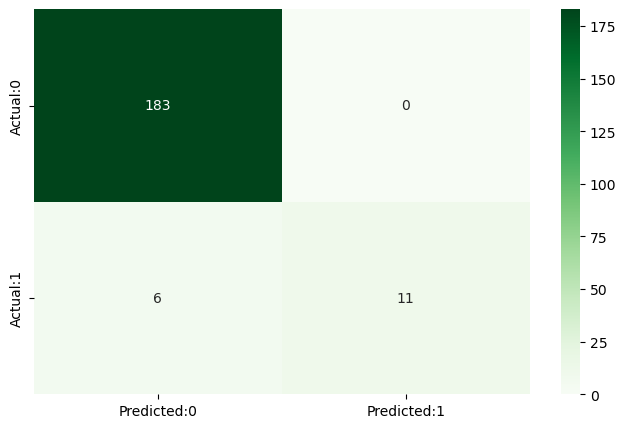

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       183
           1       1.00      0.65      0.79        17

    accuracy                           0.97       200
   macro avg       0.98      0.82      0.88       200
weighted avg       0.97      0.97      0.97       200



0.97

In [338]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
 
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(ytest, ypred))

#Accuracy 
acc=accuracy_score(ytest,ypred)
acc